# What Makes the most Popular Country for Studying Abroad?

#### By: Richard Mu, Shea Chen
### Introduction
Studying abroad has appeared to be increasing in popularity in recent years both in the Univeristy of Maryland and in other Universities across the United States. University of Maryland alone offers semester exchange program to over 60 countries around the world.

While we are excited to see that students has became more enthusiastic and understanding on the purpose and benefits of studying abroad, we also wanted to examine various attributes of the countries to see which ones may be the most suitable for studying abroad. We understand that selecting a country to study abroad in is a decision that each students make base on various factors, such as personal sentient and ethnic background. However, we are also curious about how the characteristics of each country, such as crime rates, may relate to the number of students studying abroad there.
### 1. DATA COLLECTION
We imported several Python libraries that will be helpful in the process of our analysis. We will explain their functionality throughout this tutorial as they appear. Here are some documentation pages that we found convenient for referencing:<br>
1. [pandas library](https://pandas.pydata.org/pandas-docs/stable/)
2. [NumPy Manual](https://docs.scipy.org/doc/numpy/index.html)
3. [matplotlib pyplot library](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html)
4. [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
5. [Seaborn Visualization](https://seaborn.pydata.org/index.html)


In [23]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import warnings
import requests
import re
from bs4 import BeautifulSoup
import seaborn as sns
#pd.set_option('display.max_rows', 600)   # Set full visualization of dataframes 
warnings.filterwarnings('ignore')

Since we could not find a source that contains all the information we would like to analyze, we decided combine several datasets and tables from multiple sources together.
<br>
First, we found a [dataset](https://www.iie.org/Research-and-Insights/Open-Doors/Data/US-Study-Abroad/Destinations) that listed the number of students in the United States that studied abroad at each country in the 2017-2018 school year. The data was downloaded as an excel sheet (or .xlsx) format so we simply used a Pandas function to read it into a Pandas DataFrame.

In [24]:
travel_data_2017 = pd.read_excel(open('D3A1FE70.xlsx', 'rb'),
                           sheet_name = "data")
travel_data_2017.head(10)

,Destination,2017/18
0,Cameroon,57
1,Central African Republic,0
2,Chad,2
3,"Congo, Dem. Rep. of (Kinshasa)",6
4,"Congo, Rep. of (Brazzaville)",5
5,Equatorial Guinea,7
6,Gabon,4
7,São Tomé and Príncipe,0
8,Burundi,0
9,Djibouti,0


In addition, we decided to choose three attributes that each will represent a different perspective of each country to help us give characterization.
<br><br>
__First Attribute: Peacefulness__
<br><br>
As students studying in a foreign country, we may often find ourselves worreid of places with high crime rates or recent violent uprisings. We found a [Global Peace Index](https://www.kaggle.com/xenohunter/global-peace-index) dataset on kaggle that measures the peacefulness of a country from 2008 - 2019. As students studying abroad for the 2017-2018 semester should have mostly decided their destination in 2017, we only extraded data relating to the year 2017.

In [25]:
peace_index = pd.read_csv('gpi-2008-2019.csv')
peace_index = peace_index[['Country','2017 rank', '2017 score']]
peace_index.head(10)

,Country,2017 rank,2017 score
0,Iceland,1,1.084
1,New Zealand,2,1.216
2,Portugal,3,1.273
3,Austria,4,1.292
4,Denmark,5,1.299
5,Canada,6,1.332
6,Singapore,12,1.400
7,Slovenia,9,1.373
8,Japan,10,1.377
9,Switzerland,7,1.368


__Second Attribute: Cost of Living__
<br><br>
Studying abroad can often be seen as expensive because of the initial traveling costs, application fees, and etc. Furthermore, the financial complications continues after students arrive in their host country and remains throughout their time abroad. We visited the webpage [Numbeo]('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2017') for cost of living index data of each country in the year 2017.

In [26]:
r = requests.get('https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2017')
root = BeautifulSoup(r.content)

# Find table from html
table = root.find("table", {"id": "t2"})

# Convert to dataframe
cost_living = pd.read_html(str(table))
cost_living = cost_living[0]
cost_living = cost_living[['Country', 'Cost of Living Index']]
cost_living.head(10)

,Country,Cost of Living Index
0,Bermuda,146.19
1,Switzerland,122.06
2,Iceland,111.71
3,Norway,106.31
4,Bahamas,104.05
5,Us Virgin Islands,85.86
6,Japan,85.28
7,Italy,83.70
8,Denmark,83.02
9,Singapore,82.41


In [5]:
centroids = pd.read_csv('country_centroids_az8.csv')
centroids = centroids[['sovereignt','Longitude','Latitude']]
centroids


,sovereignt,Longitude,Latitude
0,Netherlands,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,United Kingdom,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Finland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [6]:
happiness = pd.read_csv('2017-happiness.csv')
happiness = happiness[['Country','Happiness.Score']]
happiness

,Country,Happiness.Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469
5,Netherlands,7.377
6,Canada,7.316
7,New Zealand,7.314
8,Sweden,7.284
9,Australia,7.284


In [7]:
fulldata = pd.merge(left = travel_data_2017,right = peace_index, left_on="Destination", right_on="Country")
fulldata = fulldata[['Destination','2017/18', '2017 score']]
fulldata.columns = ['Country','Student Count','Peace Score']
fulldata = pd.merge(left = fulldata, right = happiness, left_on="Country", right_on="Country")
fulldata = pd.merge(left = fulldata, right = cost_living, left_on="Country", right_on="Country")
fulldata = fulldata.sort_values('Student Count')

fulldata

,Country,Student Count,Peace Score,Happiness.Score,Cost of Living Index
97,Libya,0,3.340,5.525,45.85
32,Belarus,0,2.106,5.569,33.84
93,Syria,0,3.462,3.462,28.31
89,Kuwait,0,1.823,6.105,75.24
95,Algeria,1,2.188,5.872,32.38
85,Iran,2,2.344,4.692,38.26
86,Iraq,3,3.516,4.497,47.04
19,Pakistan,5,3.080,5.269,27.18
50,Moldova,6,1.944,5.838,28.37
92,Saudi Arabia,8,2.346,6.344,48.37


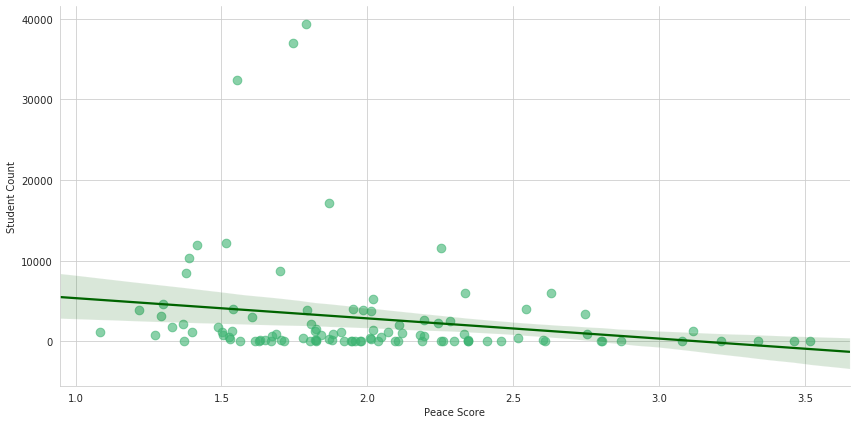

In [8]:
sns.set_style("whitegrid")

#fit, ax = plt.subplots(figsize = (12,10))

peace = sns.lmplot(x='Peace Score', y ="Student Count", size=6, aspect =  2, 
                   scatter_kws={"s":75,"alpha":0.6,"color":'mediumseagreen'},
                   line_kws={"color":'darkgreen'},data = fulldata)
peace

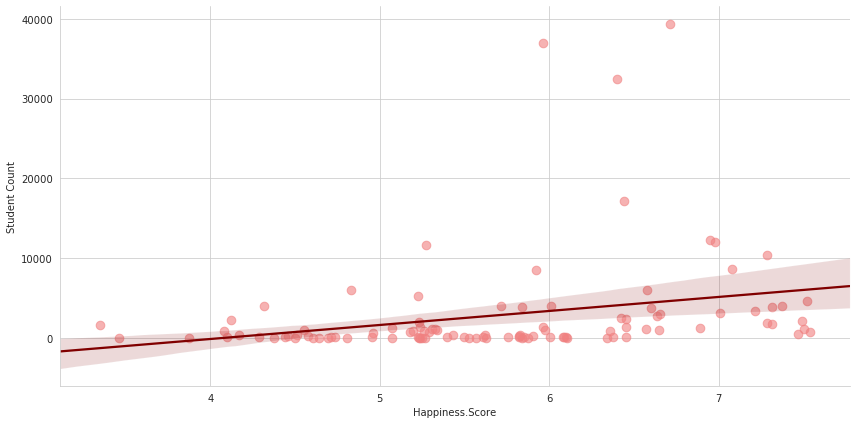

In [9]:
happiness = sns.lmplot(x='Happiness.Score', y ="Student Count", size=6, aspect = 2, 
                   scatter_kws={"s":75,"alpha":0.6,"color":'lightcoral'},
                   line_kws={"color":'maroon'},data = fulldata)
happiness

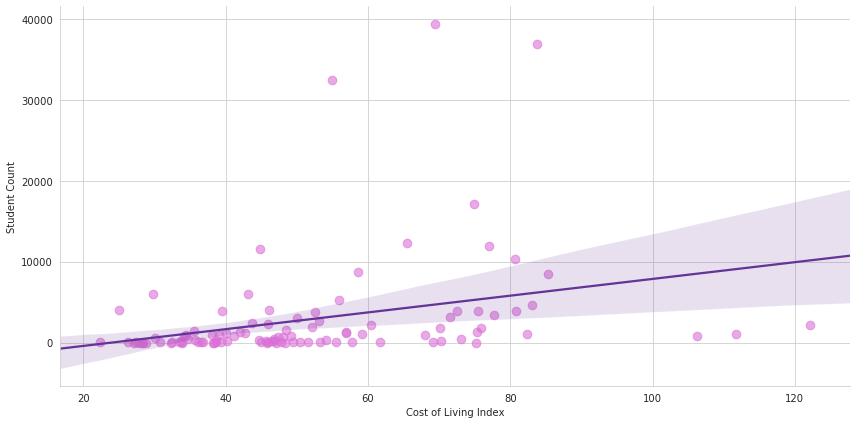

In [10]:
cost = sns.lmplot(x='Cost of Living Index', y ="Student Count", size=6, aspect = 2, 
                   scatter_kws={"s":75,"alpha":0.6,"color":'orchid'},
                   line_kws={"color":'rebeccapurple'},data = fulldata)
cost

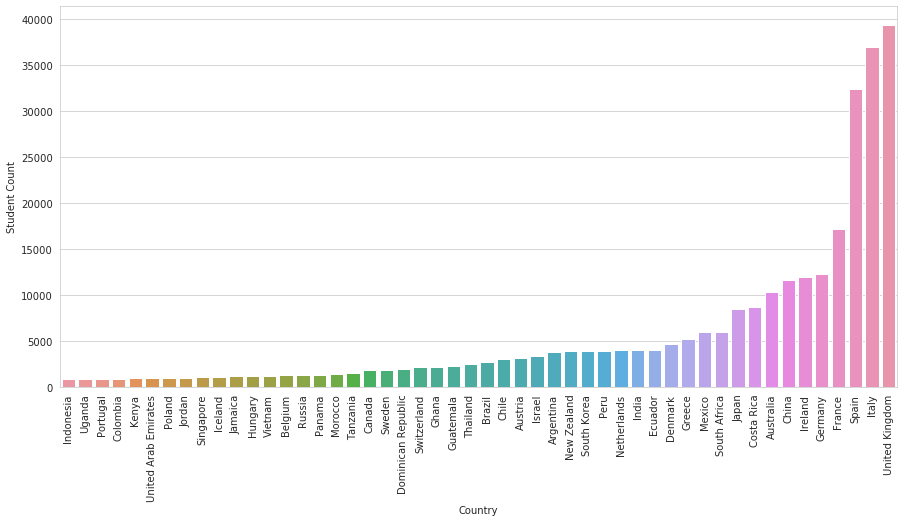

In [11]:
matplotlib.rcParams['figure.figsize']=[15, 7]
plt.xticks(rotation='vertical')


top50 = fulldata.iloc[-50:]
bar_count = sns.barplot( x = "Country", y = "Student Count",data = top50, orient='v')

In [12]:
category = []
catkey = ['2 to 3','3 to 4','4 to 5','5 to 6','6 to 7','7 to 8']
for index, row in fulldata.iterrows():
    if row[3] >= 2 and row[3] < 3:
        category.append('2 to 3')
    if row[3] >= 3 and row[3] < 4:
        category.append('3 to 4')
    if row[3] >= 4 and row[3] < 5:
        category.append('4 to 5')
    if row[3] >= 5 and row[3] < 6:
        category.append('5 to 6')
    if row[3] >= 6 and row[3] < 7:
        category.append('6 to 7')
    if row[3] >= 7 and row[3] < 8:
        category.append('7 to 8')

fulldata['Happiness Category'] = category
    
        

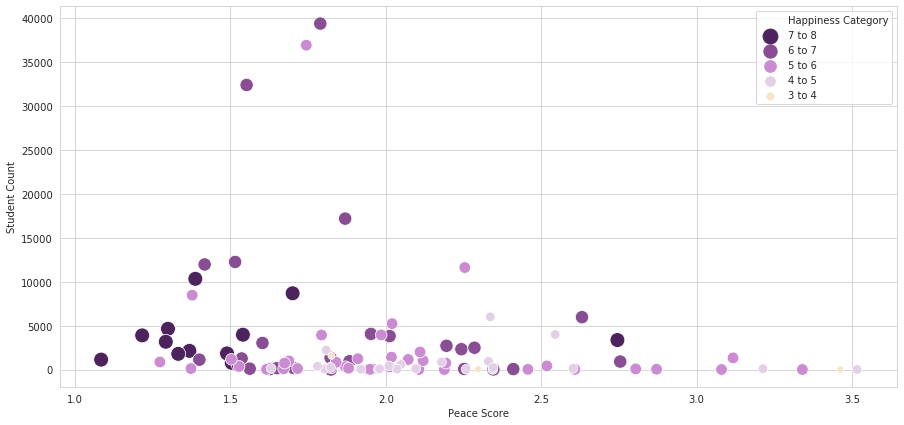

In [13]:
#cmap = sns.cubehelix_palette(dark = .3, light = .8, as_cmap=True)
palette = {"2 to 3":"#FFF8EF","3 to 4":"#F7E3CA", "4 to 5":"#E2D1E6", "5 to 6":"#ca8bd2",
           "6 to 7":"#894d94", "7 to 8":"#4D235D"}

sizesdict = {"2 to 3":2,"3 to 4":4, "4 to 5":6, "5 to 6":8,
           "6 to 7":10, "7 to 8":12}

hap_sort = fulldata.sort_values("Happiness.Score", ascending = False)
hap_peace = sns.scatterplot(x="Peace Score", y="Student Count", hue="Happiness Category",
                            size = "Happiness Category",
                            sizes = (50,220),
                            palette=palette,
                            data = hap_sort)
hap_peace
